# <center>Noto 7.5 Mw 2024 Earthquake Project</center>
<center>by: Haidir Jibran</center>
<center>haidirjibran@gmail.com</center>

Noto 4.5 Mw 2024 merupakan gempa bumi besar yang sangat merusak diwilayah utara kepulauan jepang.......

<b>1. Import Module and Library</b>

In [11]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
import pandas as pd

from obspy import UTCDateTime
from obspy.clients.fdsn import Client
from obspy import read

<b>2. Mengambil Event Gempa Noto 7.5 Mw 2024</b>

Menurut Wikipedia, gempa ini terjadi pada wilayah semenanjung Noto Jepang yang berada pada koordinat 37.488N,137.271E yang terjadi pada 1 januari 2024 pukul 16.10 waktu setempat (07.10 UTC) https://en.wikipedia.org/wiki/2024_Noto_earthquake

Mendefinisikan variabel yang telah diketahui

In [3]:
eventlatitude = 37.488
eventlongitude = 137.217
eventtime = UTCDateTime('2024-01-01T16:10:00+09')

1 Event(s) in Catalog:
2024-01-01T07:10:09.474000Z | +37.489, +137.264 | 7.5  mww


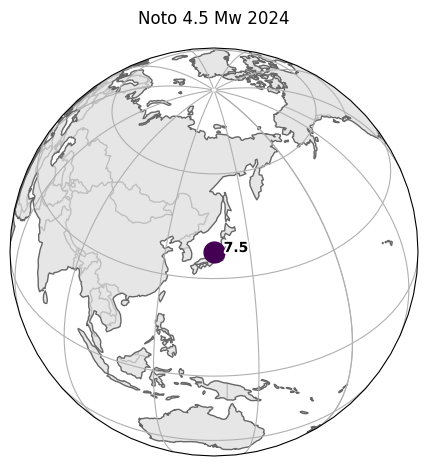

[Origin(resource_id=ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?originid=49462969"), time=UTCDateTime(2024, 1, 1, 7, 10, 9, 474000), longitude=137.2638, latitude=37.4893, depth=10000.0, creation_info=CreationInfo(author='pt,at,us'))]


In [4]:
client = Client('IRIS')
event = client.get_events(starttime=eventtime-10, endtime=eventtime+10, longitude=eventlongitude, latitude=eventlatitude, maxradius=0.5)
print(event)
event.plot(projection='ortho', title="Noto 4.5 Mw 2024")
plt.close()

print(event[0].origins)

base on A topographic map of Japan :https://en.wikipedia.org/wiki/Japan#/media/File:Japan_topo_en.jpg range of coordinate japan is 125-150E and 25-50N

here we want to plot the whole event in japan for 5 years lately (aug 2019 - aug 2024) for know the sesmicity in japan and the position of the event we want to analisys

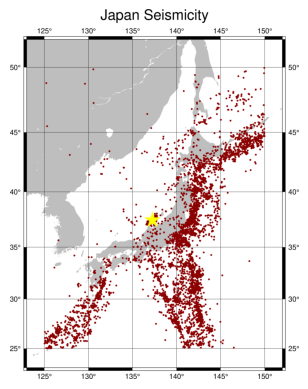

In [4]:
#os.system('./FetchEvent -s 2019-08-01,00:00:00 -e 2024-08-31,00:00:00 --lon 125:150 --lat 25:50 --mag 4:10 -o ./data/whole_japan.txt')
os.system('gmt gmtset PS_MEDIA = archE')
os.system('gmt pscoast -R123/152/23/52 -JM15 -Ba5g5/a5g5:."Japan Seismicity":WESN -Ggray -K > ./postscript/whole_japan.ps')
os.system("awk -F'|' '{print $4,$3}' ./data/whole_japan.txt | gmt psxy -R -J -Sc0.1 -Gred4 -O -K >> ./postscript/whole_japan.ps")
os.system('echo 137.264 37.489 | gmt psxy -R -J -Sa1 -Gyellow -O >> ./postscript/whole_japan.ps')
os.system('gmt psconvert ./postscript/whole_japan.ps -A -Tg')
plot_whole_japan=img.imread('./postscript/whole_japan.png')
plt.axis('off')
plt.imshow(plot_whole_japan)
plt.show()
plt.close()

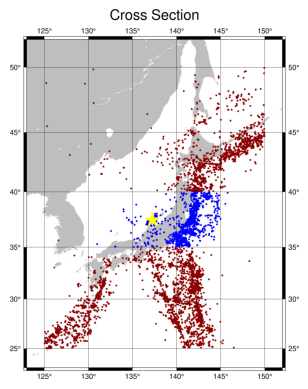

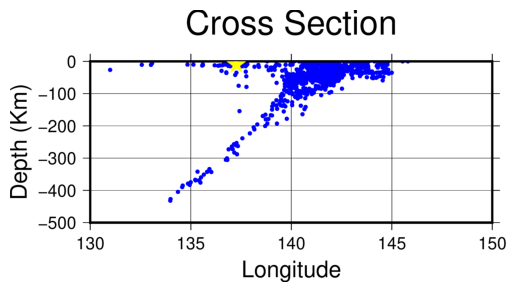

In [5]:
#os.system('./FetchEvent -s 2019-08-01,00:00:00 -e 2024-08-31,00:00:00 --lon 130:150 --lat 35:40 --mag 4:10 -o ./data/crosec.txt')
os.system('gmt gmtset PS_MEDIA = archE')
os.system('gmt pscoast -R123/152/23/52 -JM15 -Ba5g5/a5g5:."Cross Section":WESN -Ggray -K > ./postscript/crosec.ps')
os.system("awk -F'|' '{print $4,$3}' ./data/whole_japan.txt | gmt psxy -R -J -Sc0.1 -Gred4 -O -K >> ./postscript/crosec.ps")
os.system("awk -F'|' '{print $4,$3}' ./data/crosec.txt | gmt psxy -R -J -Sc0.1 -Gblue -O -K >> ./postscript/crosec.ps")
os.system('echo 137.264 37.489 | gmt psxy -R -J -Sa1 -Gyellow -O >> ./postscript/crosec.ps')
os.system('gmt psconvert ./postscript/crosec.ps -A -Tg')
plot_crosec=img.imread('./postscript/crosec.png')
plt.axis('off')
plt.imshow(plot_crosec)
plt.show()
plt.close()

os.system("awk -F'|' '{print $4,$5*-1}' ./data/crosec.txt | gmt psxy -R130/150/-500/0 -JX10/4 -Ba5g5:Longitude:/a100g100:'Depth (Km)'::.'Cross Section':WeSn -Sc0.1 -Gblue -K > ./postscript/xsec.ps")
os.system('echo 137.264 -10 | gmt psxy -R -J -Sa0.5 -Gyellow -O >> ./postscript/xsec.ps')
os.system('gmt psconvert ./postscript/xsec.ps -A -Tg')
plot_xsec=img.imread('./postscript/xsec.png')
plt.axis('off')
plt.imshow(plot_xsec)
plt.show()

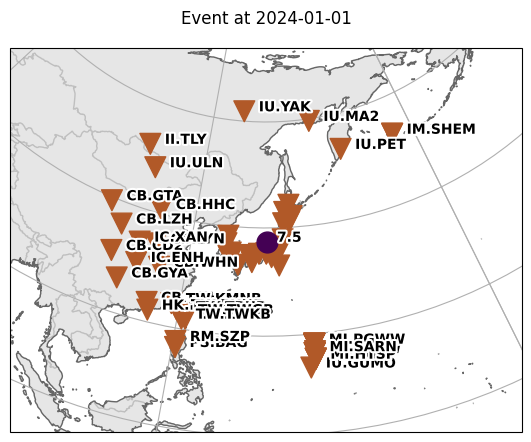

In [5]:
near_stations = client.get_stations(starttime=eventtime, endtime=eventtime+600, 
                                    location=' ,00', channel='BHZ', level='channel', 
                                    longitude=eventlongitude, latitude=eventlatitude, 
                                    minradius=2, maxradius=8)
far_stations = client.get_stations(starttime=eventtime, endtime=eventtime+600, 
                                   location=' ,00', channel='BHZ', level='channel', 
                                   longitude=eventlongitude, latitude=eventlatitude, 
                                   minradius=20, maxradius=30)

fig1 = far_stations.plot(projection='local', label=0.2, resolution='h', show=False)
fig2 = near_stations.plot(projection='local', label=False, resolution='h', fig=fig1, show=False)
event.plot(projection='local', resolution='h', fig=fig2)
plt.close()

In [10]:
network = []
station = []
location = []
channel = []
longitude = []
latitude = []
depth = []

for net in range(len(near_stations)):
    for sta in range(len(near_stations[net].stations)):
        for cha in range(len(near_stations[net].stations[sta].channels)):
            network.append(near_stations[net].code)
            station.append(near_stations[net].stations[sta].code)
            location.append(near_stations[net].stations[sta].channels[cha].location_code)
            channel.append(near_stations[net].stations[sta].channels[cha].code)
            longitude.append(near_stations[net].stations[sta].channels[cha].longitude)
            latitude.append(near_stations[net].stations[sta].channels[cha].latitude)
            depth.append(near_stations[net].stations[sta].channels[cha].depth)

for net in range(len(far_stations)):
    for sta in range(len(far_stations[net].stations)):
        for cha in range(len(far_stations[net].stations[sta].channels)):
            network.append(far_stations[net].code)
            station.append(far_stations[net].stations[sta].code)
            location.append(far_stations[net].stations[sta].channels[cha].location_code)
            channel.append(far_stations[net].stations[sta].channels[cha].code)
            longitude.append(far_stations[net].stations[sta].channels[cha].longitude)
            latitude.append(far_stations[net].stations[sta].channels[cha].latitude)
            depth.append(far_stations[net].stations[sta].channels[cha].depth)

In [13]:
waveform_network = [];waveform_station = [];waveform_location = [];waveform_channel = [];waveform_longitude = [];waveform_latitude = [];waveform_depth = []

for i in range(len(network)):
    try:
        waveform = client.get_waveforms(network[i], station[i], location[i], channel[i], starttime=eventtime, endtime=eventtime+600)
        waveform.filter('lowpass', freq=0.1)
        waveform.write('./waveform/{}.{}.{}.{}.SAC'.format(network[i], station[i], location[i], channel[i]), format='SAC')
        waveform_network.append(network[i])
        waveform_station.append(station[i])
        waveform_location.append(location[i])
        waveform_channel.append(channel[i])
        waveform_longitude.append(longitude[i])
        waveform_latitude.append(latitude[i])
        waveform_depth.append(depth[i])
    except:
        next

df = pd.DataFrame({'station':waveform_station, 'location':waveform_location, 'channel':waveform_channel, 'latitude':waveform_latitude, 'longitude':waveform_longitude, 'elevation':waveform_depth})
df.to_csc('./')

   station location channel   latitude   longitude  elevation
0      INU       00     BHZ  35.350000  137.029000        0.0
1      ERM       00     BHZ  42.015000  143.157200        0.0
2      JEM              BHZ  44.118801  142.593002        0.0
3      JEW              BHZ  42.842670  141.446167        0.0
4     JHJ2              BHZ  33.115299  139.813797        0.0
5      JHS              BHZ  35.001831  133.113663        0.0
6      JKA              BHZ  44.118801  142.593002        0.0
7      JMM              BHZ  37.868999  140.789673        0.0
8      JMN              BHZ  33.731499  133.876328        0.0
9      JNU              BHZ  33.125000  130.876694        0.0
10     JSG              BHZ  34.677670  138.182999        0.0
11     JTM              BHZ  40.789501  141.064667        0.0
12     JTU              BHZ  34.527500  129.396301        0.0
13     JWT              BHZ  35.285671  135.398666        0.0
14     JYT              BHZ  36.230831  140.190674        0.0
15     T

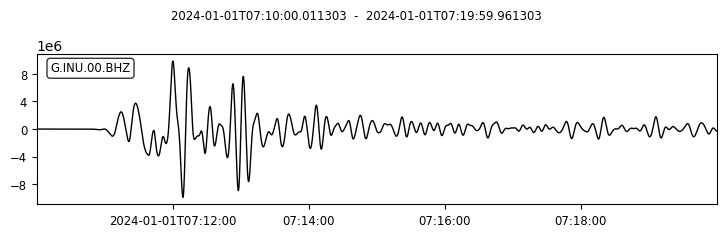

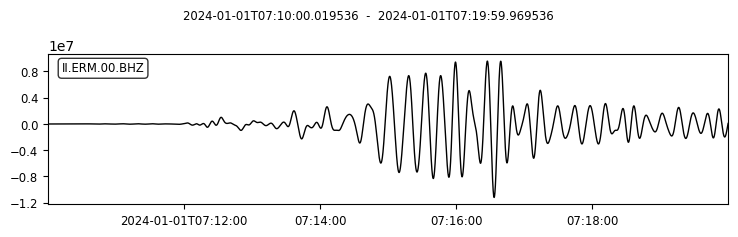

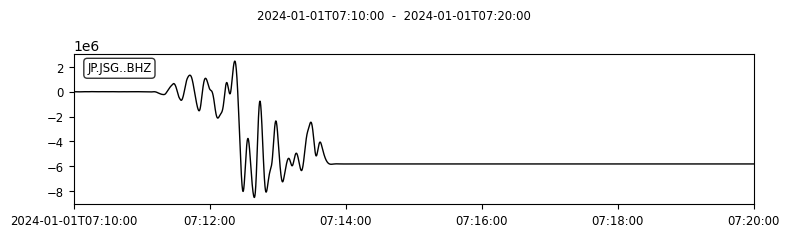

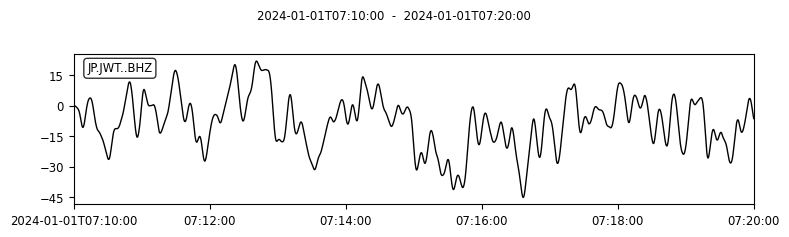

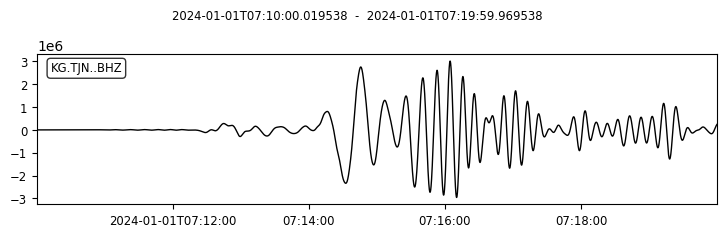

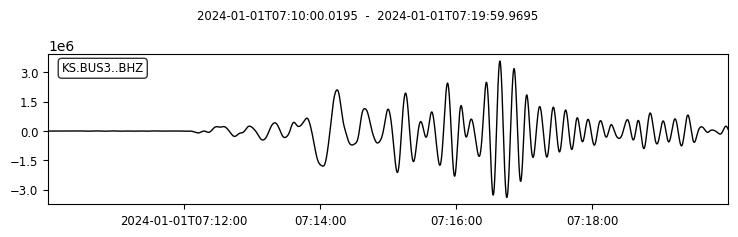

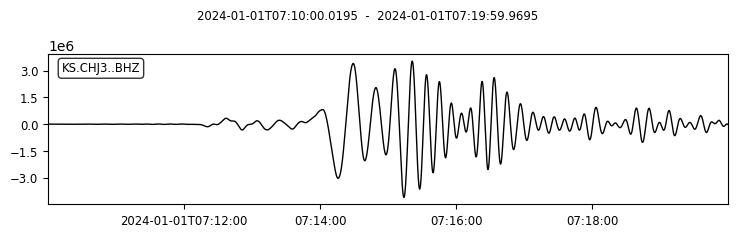

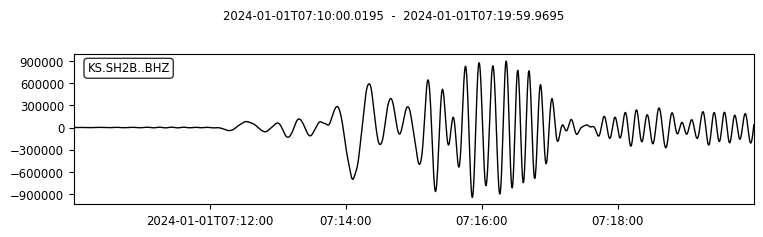

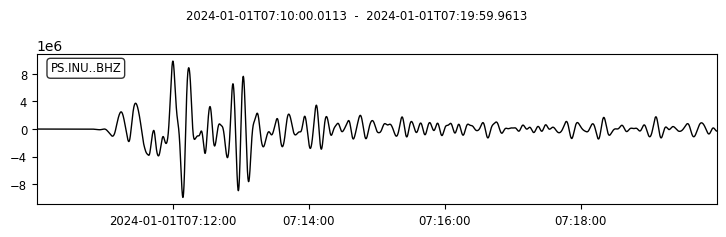

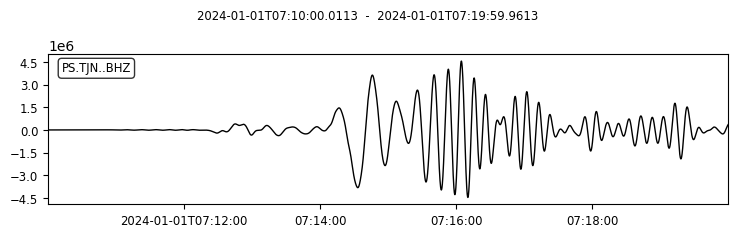

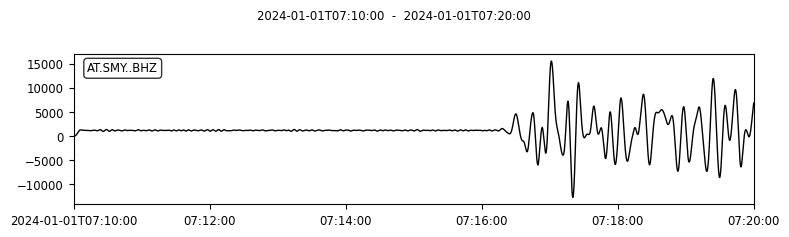

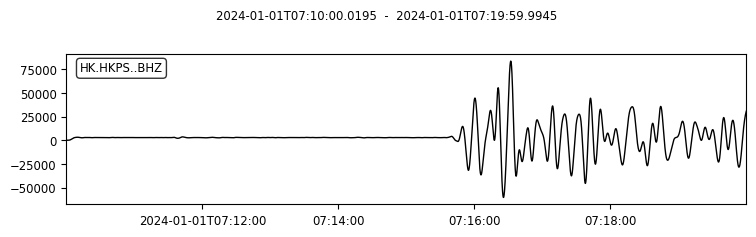

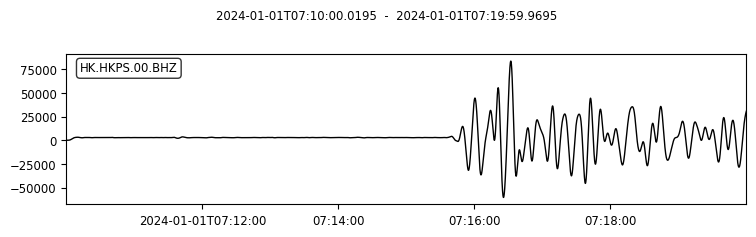

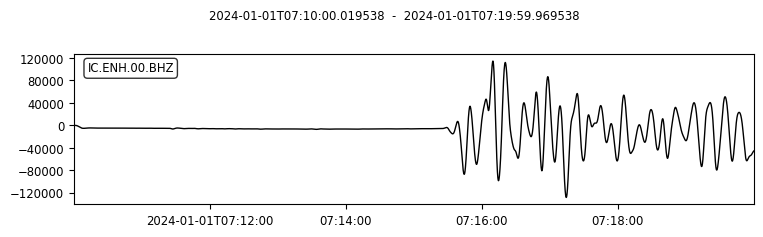

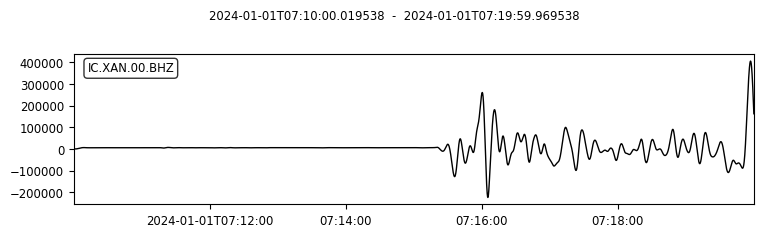

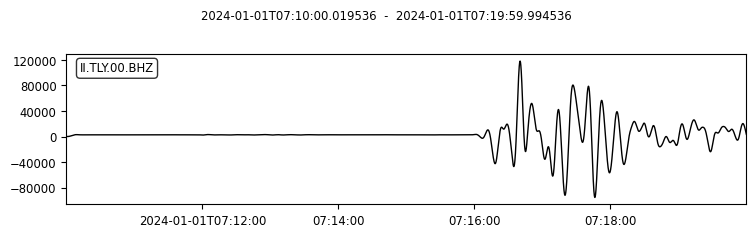

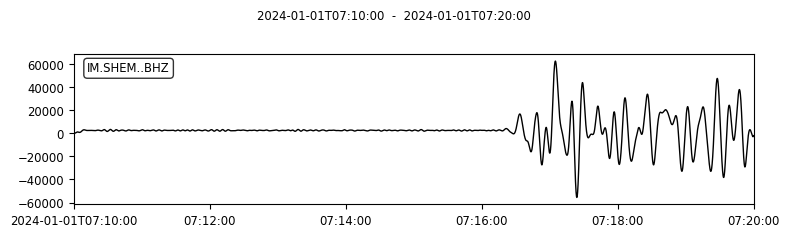

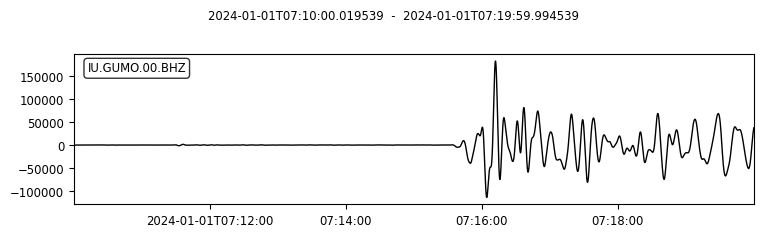

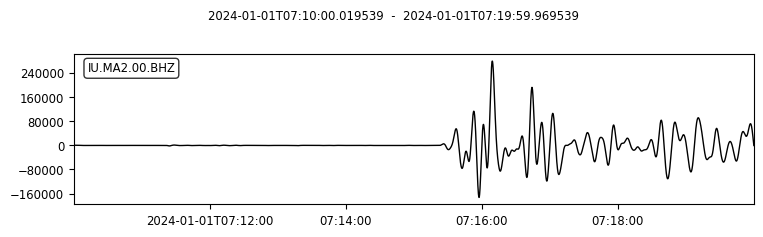

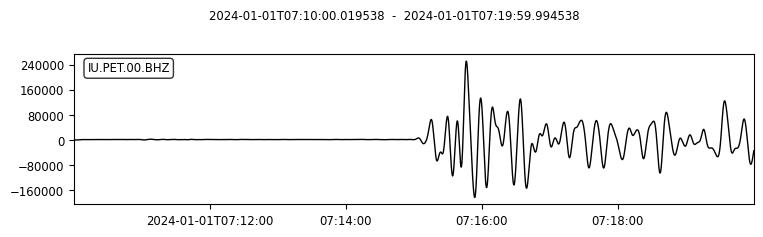

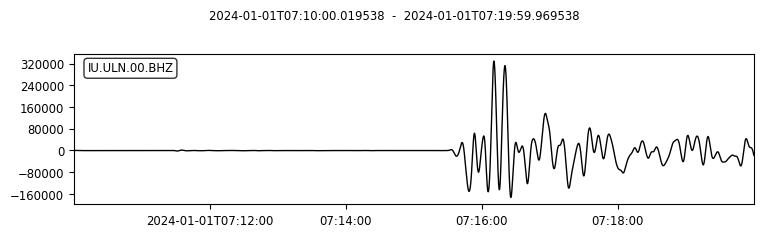

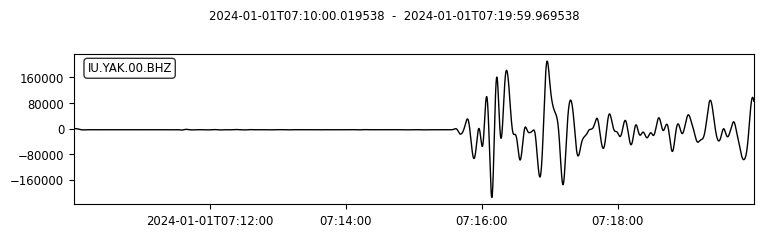

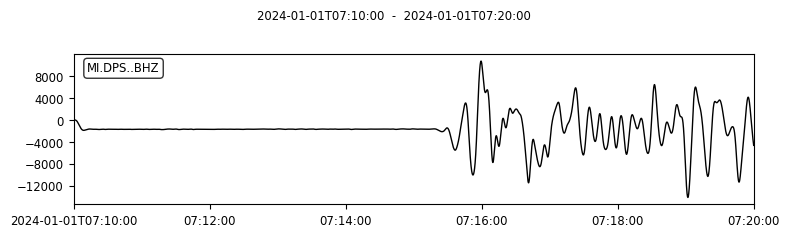

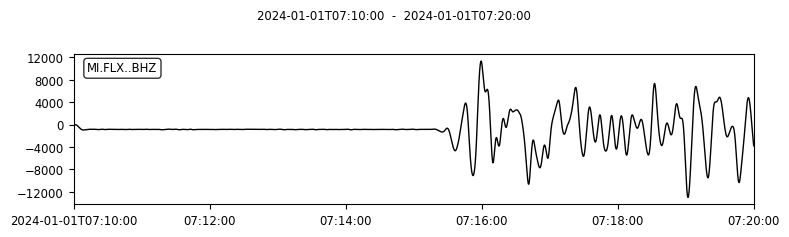

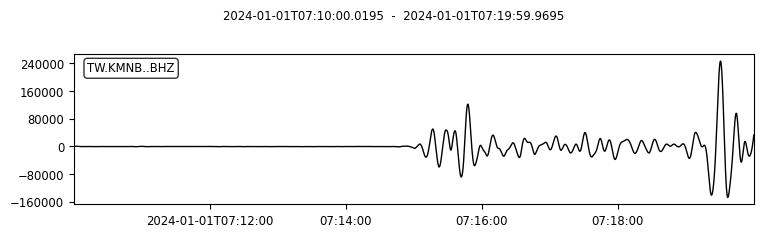

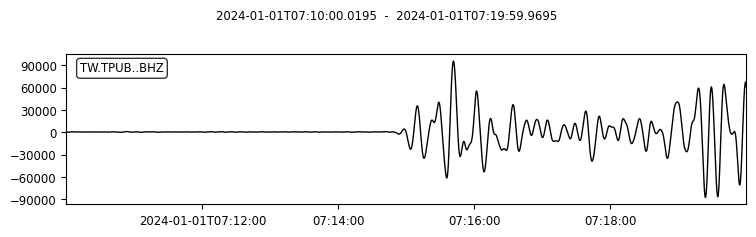

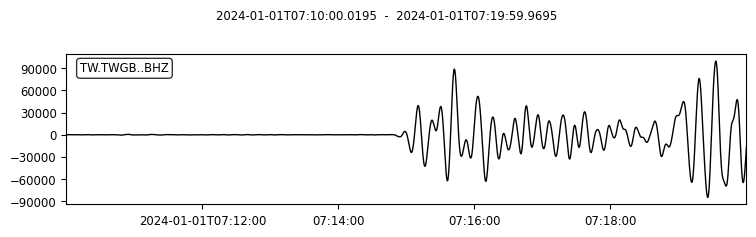

In [9]:
waveforms = []
for i in range(len(network)):
    try:
        wv =  read('./waveform/{}.{}.{}.{}.SAC'.format(network[i], station[i], location[i], channel[i]))
        waveforms.append(wv)
        wv.plot()
    except:
        next

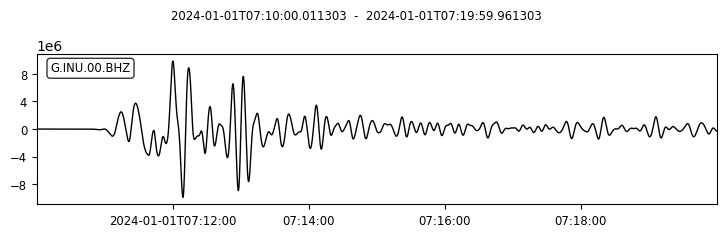

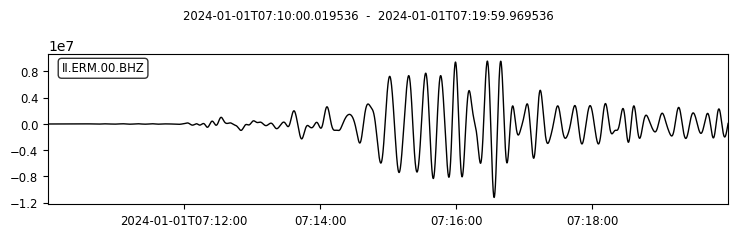

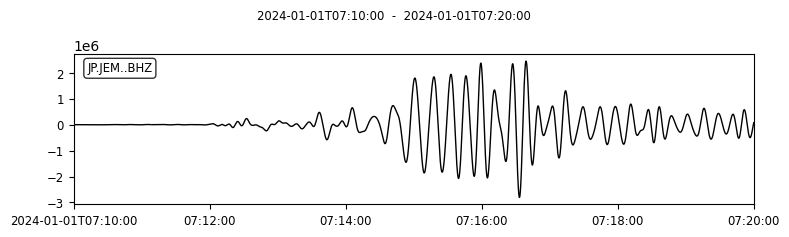

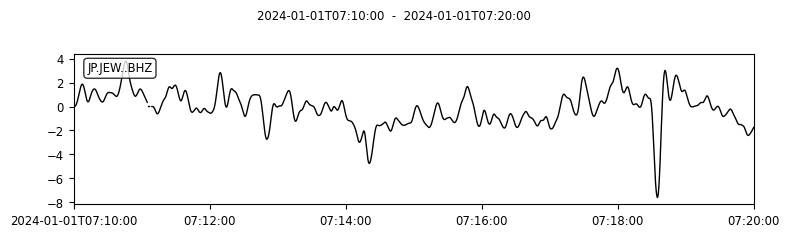

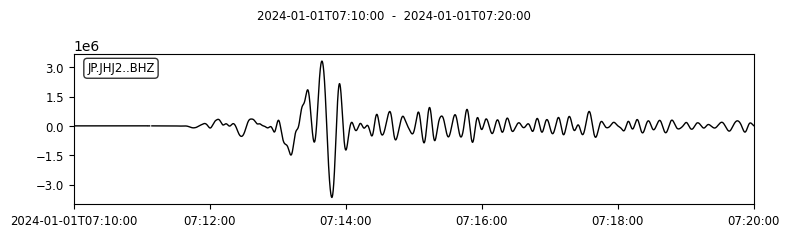

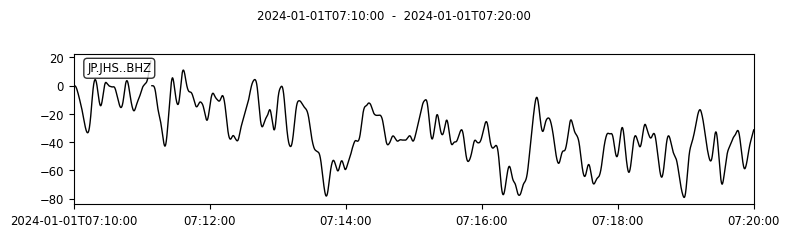

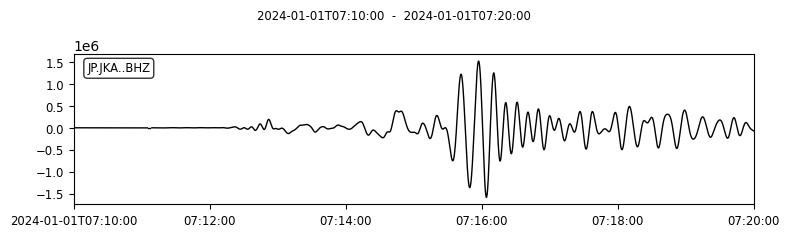

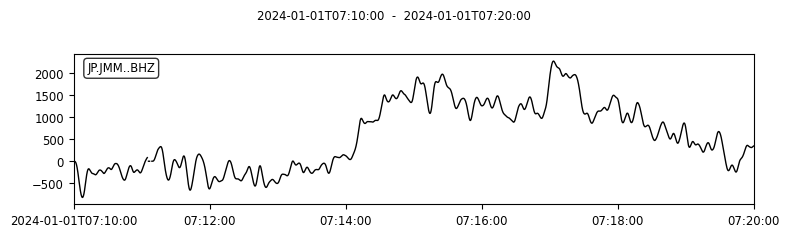

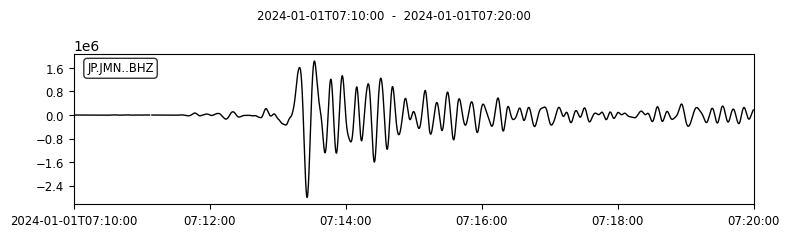

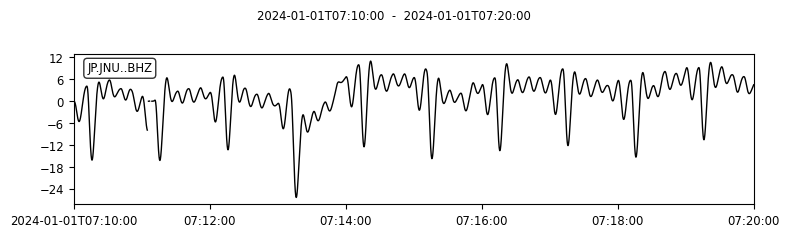

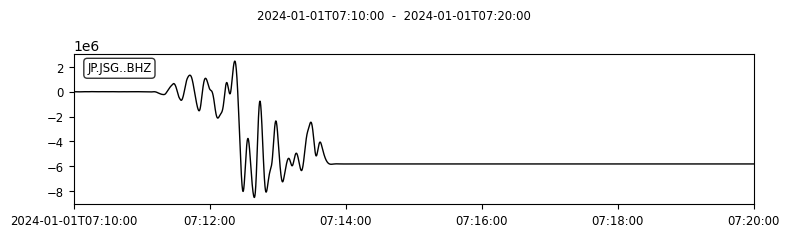

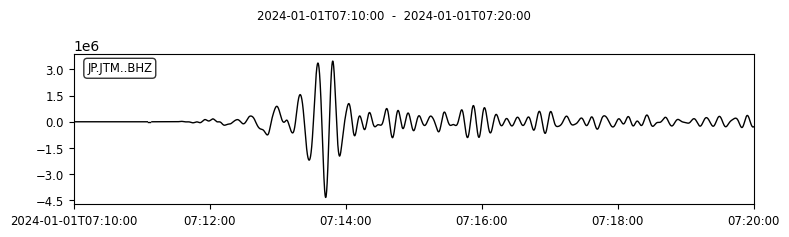

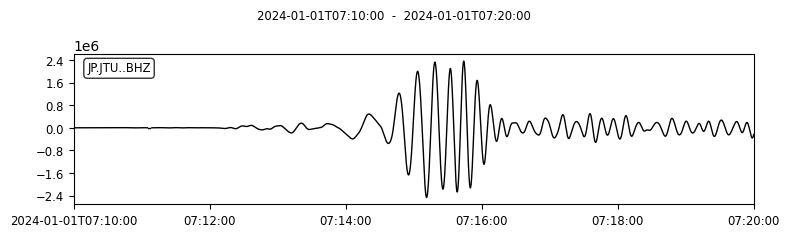

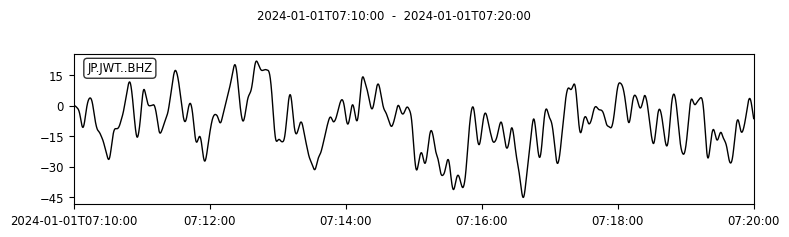

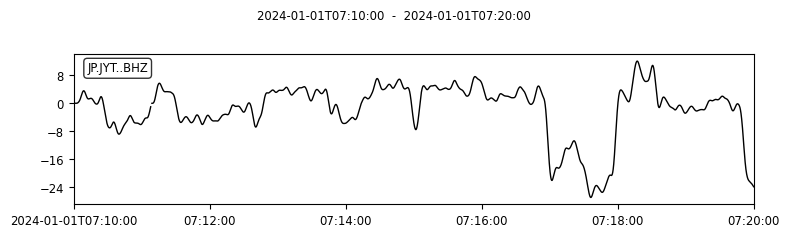

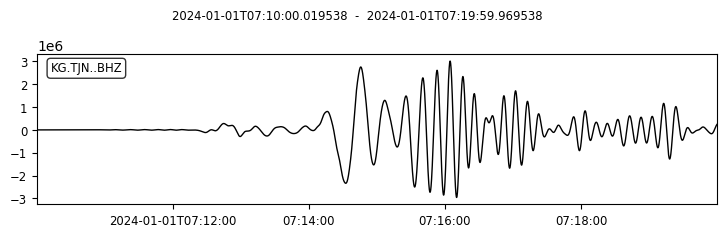

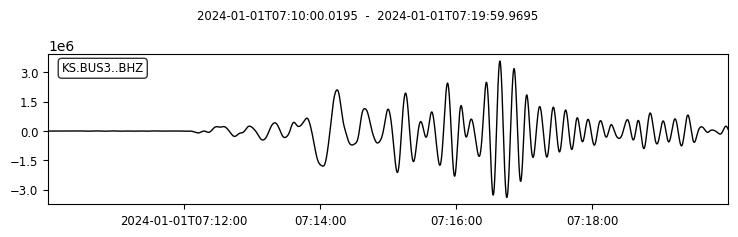

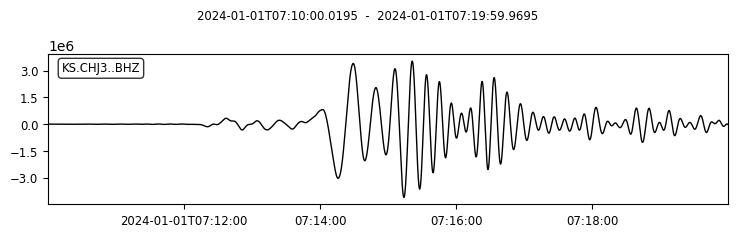

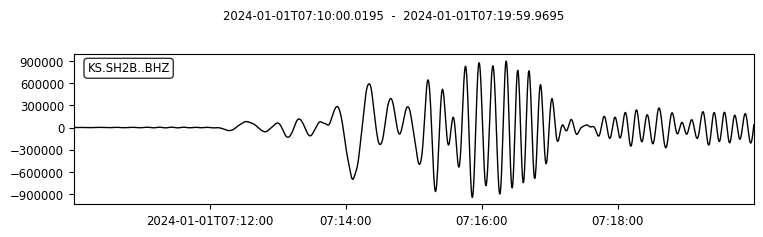

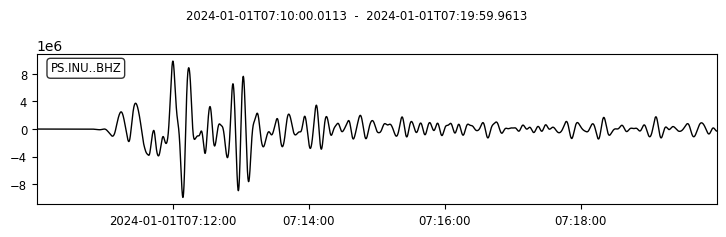

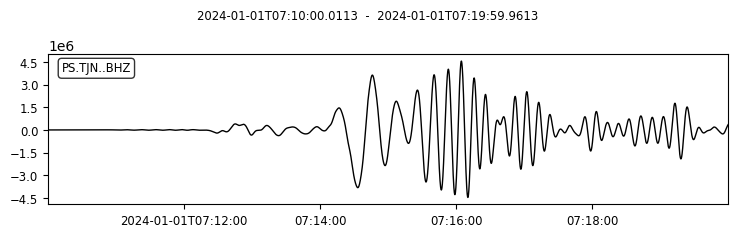

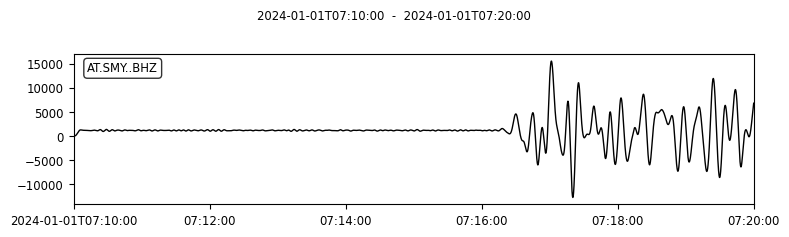

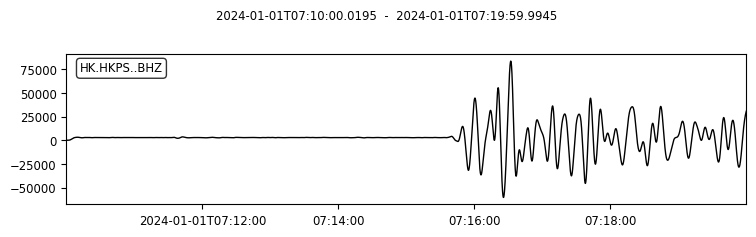

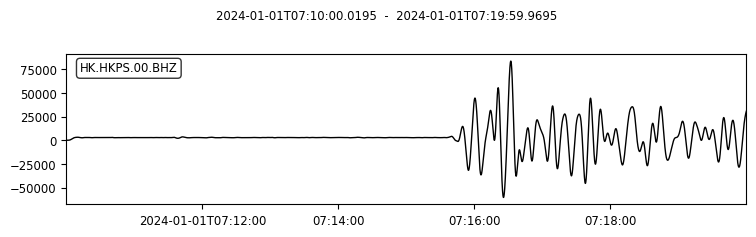

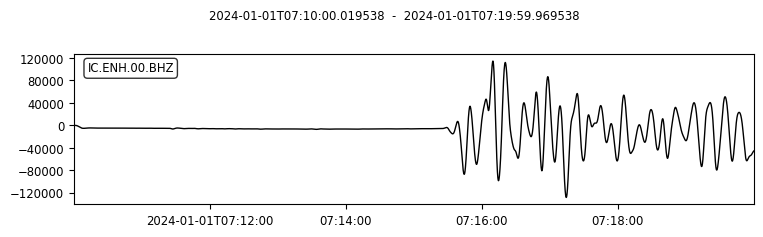

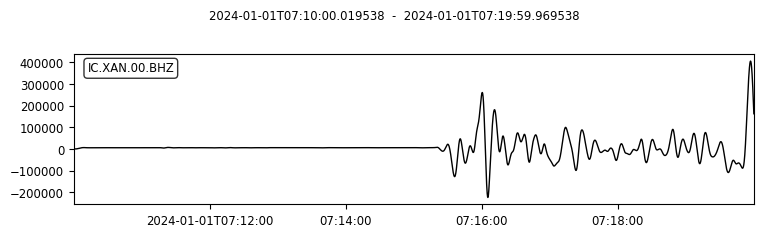

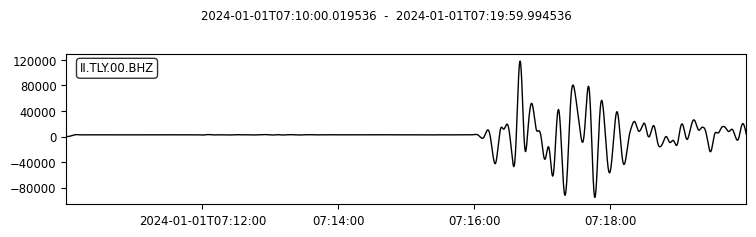

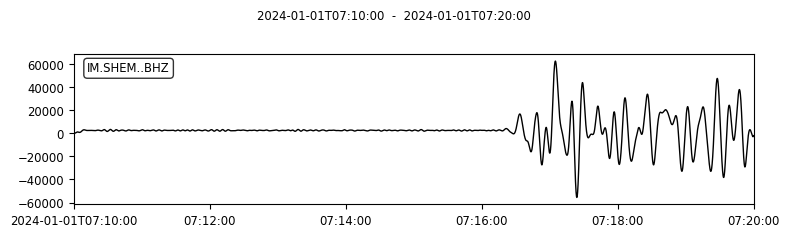

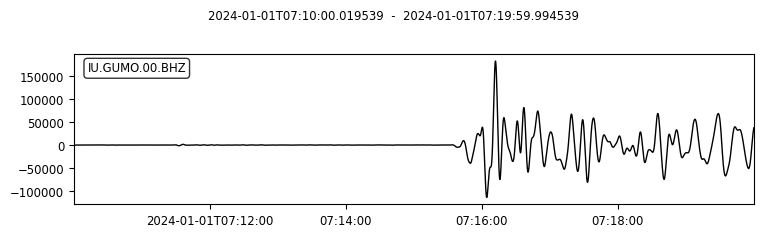

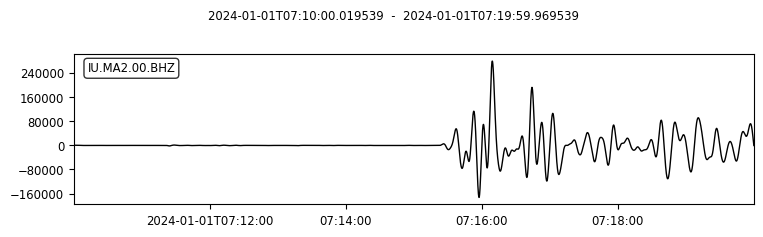

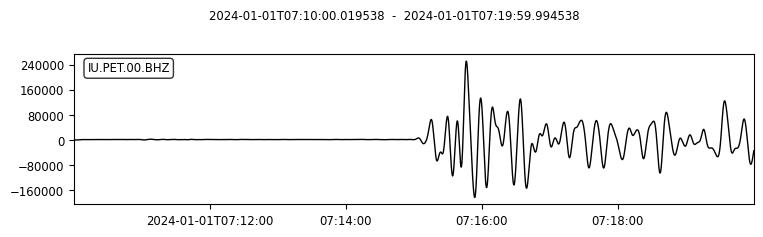

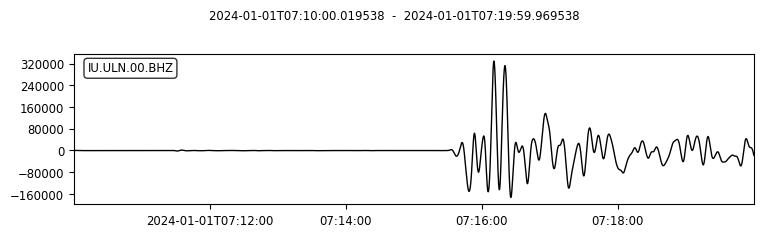

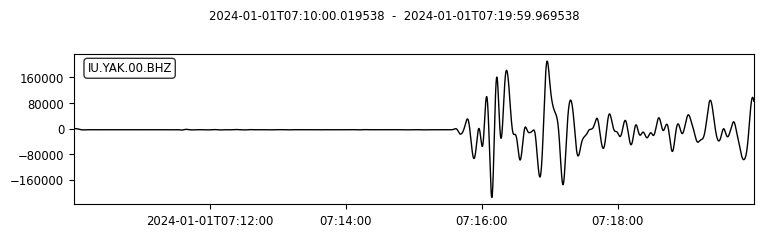

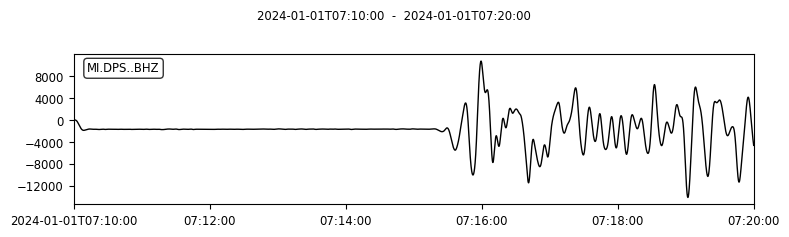

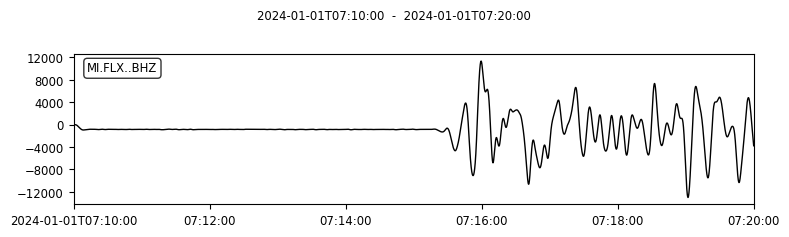

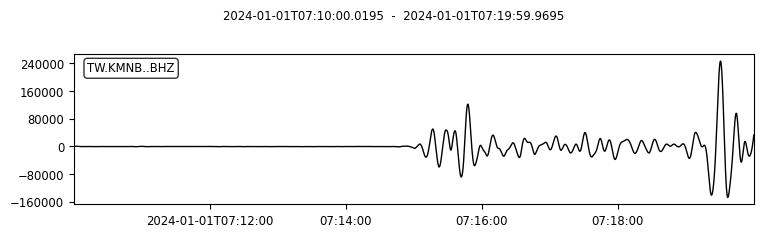

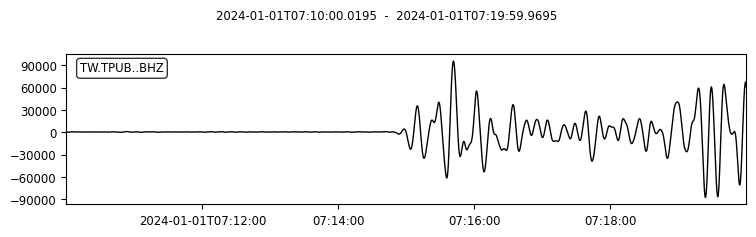

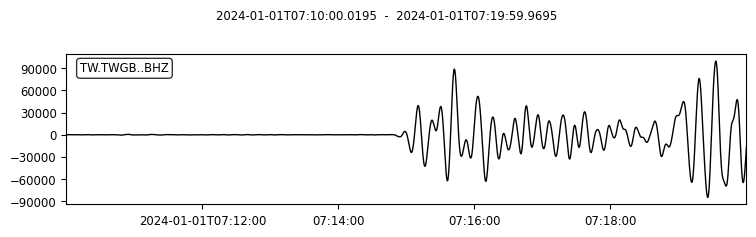

In [27]:
for wv in waveforms:
    filtered_wv = wv
    filtered_wv.filter('lowpass', freq=0.1)
    filtered_wv.plot()

In [21]:
import os
os.system(
    'python3 SKHASH/SKHASH.py SKHASH/dat/control_file.txt'
)

SKHASH v0.1 (2024-02-16)
Control file: SKHASH/dat/control_file.txt
Creating lookup table (0/0): SKHASH/dat/mvel.txt
	Created table.
Computing mechanisms in serial...


Traceback (most recent call last):
  File "/mnt/d/workshop/seismology-skill-building-workshop/2024_Noto_earthquake_swarm_project/SKHASH/SKHASH.py", line 477, in <module>
    mech_dict=compute_mech.compute_mech(event_x,num_events,event_id,group_pol_df.get_group(event_id),
  File "/mnt/d/workshop/seismology-skill-building-workshop/2024_Noto_earthquake_swarm_project/SKHASH/functions/compute_mech.py", line 97, in compute_mech
    faultnorms_all,faultslips_all=fun.focal_gridsearch(sr_azimuth,takeoff,p_pol,sp_amp,dir_cos_dict,nextra,ntotal,qextra,qtotal,p_dict['maxout'],dir_cos_dict['ncoor'])
  File "/mnt/d/workshop/seismology-skill-building-workshop/2024_Noto_earthquake_swarm_project/SKHASH/functions/fun.py", line 983, in focal_gridsearch
    p_b1=np.tensordot(xyz,dir_cos_dict['b1'],axes=[[0],[0]])
  File "/home/haidir/celebes-stress-inversion-project/lib/python3.10/site-packages/numpy/core/numeric.py", line 1121, in tensordot
    res = dot(at, bt)
numpy.core._exceptions._ArrayMemoryError: 

256